### IoU (Intersection over union)

IoU измеряет перекрытие между двумя границами. Мы используем его для измерения того, насколько сильно наша предсказанная граница совпадает с истиной (границей реального объекта). В некоторых наборах данных мы заранее определяем порог IoU (например, 0.5) для классификации того, является ли предсказание True Positive или False Positive.

Например, рассмотрим предсказание сети для фотографии яблока:

In [ ]:
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/L12/red_apple.jpg -O img.jpg

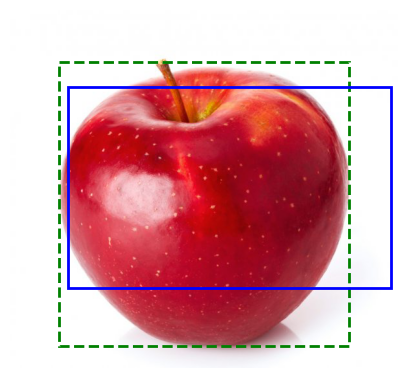

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

img = Image.open("img.jpg")
array = np.array(img)

fig, ax = plt.subplots(figsize=(5, 5))

x0 = 75
y0 = 80
w0 = 450
h0 = 440

ground_truth = Rectangle(
    (x0, y0), w0, h0, linewidth=2, edgecolor="g", linestyle="--", facecolor="none"
)

x1 = 90
y1 = 120
w1 = 500
h1 = 310
predicted = Rectangle((x1, y1), w1, h1, linewidth=2, edgecolor="b", facecolor="none")

ax.add_patch(ground_truth)
ax.add_patch(predicted)

ax.imshow(array)
ax.axis("off")
plt.show()

IoU определена как

$\displaystyle\mathrm{IoU} = \frac{\text{area of overlap}}{\text{area of union}}$

Посчитаем *area of overlap* и *area of union*:

In [ ]:
def area_of_overlap(x0, y0, x1, y1, w0, w1, h0, h1):
    x0_max = x0 + w0
    y0_max = y0 + h0
    x1_max = x1 + w1
    y1_max = y1 + h1
    dx = min(x0_max, x1_max) - max(x0, x1)
    dy = min(y0_max, y1_max) - max(y0, y1)
    if (dx >= 0) and (dy >= 0):
        return dx * dy


def area_of_rectangle(w, h):
    return w * h


# Compute intersection areas of the predictions
a_of_overlap = area_of_overlap(x0, y0, x1, y1, w0, w1, h0, h1)

# Compute individual areas of the rectangles
a_0 = area_of_rectangle(w0, h0)
a_1 = area_of_rectangle(w1, h1)

# Compute area of their union
a_of_union = a_0 + a_1 - a_of_overlap

print("Area of overlap = %i" % a_of_overlap)
print("Area of union = %i" % a_of_union)

Area of overlap = 134850
Area of union = 218150


Теперь посчитаем IoU

In [ ]:
IoU = a_of_overlap / a_of_union
print("IoU = %.2f" % IoU)

IoU = 0.62


Посмотрим, как будет меняться IoU в зависимости от качества предсказания

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets


def plot_predictions_and_calculate_IoU(x1, y1, w1, h1):
    fig, ax = plt.subplots(figsize=(5, 5))

    x0 = 75
    y0 = 80
    w0 = 450
    h0 = 440

    ground_truth = Rectangle(
        (x0, y0), w0, h0, linewidth=2, edgecolor="g", linestyle="--", facecolor="none"
    )
    predicted = Rectangle(
        (x1, y1), w1, h1, linewidth=2, edgecolor="b", facecolor="none"
    )

    ax.add_patch(ground_truth)
    ax.add_patch(predicted)

    ax.imshow(array)
    ax.axis("off")

    a_of_overlap = area_of_overlap(x0, y0, x1, y1, w0, w1, h0, h1)
    a_0 = area_of_rectangle(w0, h0)
    a_1 = area_of_rectangle(w1, h1)
    a_of_union = a_0 + a_1 - a_of_overlap
    IoU = a_of_overlap / a_of_union
    print("IoU = %.2f" % IoU)
    plt.show()


interact(
    plot_predictions_and_calculate_IoU,
    x1=widgets.IntSlider(min=0, max=array.shape[0], step=10, value=90),
    y1=widgets.IntSlider(min=0, max=array.shape[1], step=10, value=120),
    w1=widgets.IntSlider(min=0, max=array.shape[0], step=10, value=500),
    h1=widgets.IntSlider(min=0, max=array.shape[1], step=10, value=310),
);

interactive(children=(IntSlider(value=90, description='x1', max=555, step=10), IntSlider(value=120, descriptio…

Видим, что чем лучше предсказание совпадает с реальностью, тем выше у нас значение метрики IoU